# Import libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data

In [176]:
df_raw = pd.read_excel('Templates ID/Cleaned DataSet for Modeling.xlsx', sheet_name='Sheet1')
df_raw.head()

,MSCAD_ID,COMPANY_ID,COMPANY_NAME_static,Parent_Company_Name,COMPANY_TYPE,CASE_TYPE,CASESTATUS,updated_case_status,updated_case_type,SETTLEMENT_AMOUNT,...,PAY_SCORE,GOVERNANCE_SCORE,PICSCode,Industry_Name,Year,Pillar Score,PICS6,PICS4,PICS2,updated_Loss_Years
0,1118334.0,16459625.0,The Comptroller Of The Currency Office Of,Office of the Comptroller of the Currency,PSB,Capital Regulatory Actions,Pending,Pending,Regulatory/Other,0.0,...,6.309412,6.033529,20201070.0,Diversified Support Services,NaN,No Pillar Score,Commercial Services & Supplies,Commercial & Professional Services,Industrials,NaN
1,1195452.0,2750616.0,Seed-Co Ltd,Seed Co Limited,PUB,Capital Regulatory Actions,Investigation,Other,Regulatory/Other,0.0,...,6.562981,5.916346,30202010.0,Agricultural Products,NaN,No Pillar Score,Food Products,"Food, Beverage & Tobacco",Consumer Staples,NaN
2,1137575.0,1009996.0,"Mattel, Inc.","Mattel, Inc.",PUB,Securities Class Action,Settled,Settled,Class/Collective,0.0,...,4.500000,6.000000,25202010.0,Leisure Products,After 2004,Pillar Score,Leisure Products,Consumer Durables & Apparel,Consumer Discretionary,2020
3,1211237.0,1009996.0,"Mattel, Inc.","Mattel, Inc.",PUB,Derivative Shareholder Action,Pending,Pending,Derivative,0.0,...,4.500000,6.000000,25202010.0,Leisure Products,After 2004,Pillar Score,Leisure Products,Consumer Durables & Apparel,Consumer Discretionary,2020
4,1175540.0,1009996.0,"Mattel, Inc.","Mattel, Inc.",PUB,Securities Class Action,Pending,Pending,Class/Collective,0.0,...,4.500000,6.000000,25202010.0,Leisure Products,After 2004,Pillar Score,Leisure Products,Consumer Durables & Apparel,Consumer Discretionary,2019


In [184]:
# drop irrelevant columns
columns2keep = ['SETTLEMENT_AMOUNT',
       'MarketCap_18_Months_Prior_Loss_date',
       'MarketCap_6_Months_Prior_Loss_date', 'MarketCap_Trend_6_18_Months',
       'MarketCap_15_Months_Prior_Loss_date',
       'MarketCap_3_Months_Prior_Loss_date', 'MarketCap_Trend_3_15_Months',
       'MarketCap_at_Loss_date', 'Current_MarketCap',
       'Current_MarketCap_12Months_prior', 'MarketCap_Trend_Current',
       'approx_loss_year', 
       'COUNTRY_GROUP_CONTINENT',# 'COUNTRY_GROUP_Region',
        'COUNTRY_CODE',
        # 'severityContinent',
       'ACCOUNTING_SCORE', 'BOARD_SCORE', 'OWNERSHIP_AND_CONTROL_SCORE',
       'PAY_SCORE', 'GOVERNANCE_SCORE', 'PICS2']

df = df_raw[columns2keep]
df.head()

,SETTLEMENT_AMOUNT,MarketCap_18_Months_Prior_Loss_date,MarketCap_6_Months_Prior_Loss_date,MarketCap_Trend_6_18_Months,MarketCap_15_Months_Prior_Loss_date,MarketCap_3_Months_Prior_Loss_date,MarketCap_Trend_3_15_Months,MarketCap_at_Loss_date,Current_MarketCap,Current_MarketCap_12Months_prior,MarketCap_Trend_Current,approx_loss_year,COUNTRY_GROUP_CONTINENT,COUNTRY_CODE,ACCOUNTING_SCORE,BOARD_SCORE,OWNERSHIP_AND_CONTROL_SCORE,PAY_SCORE,GOVERNANCE_SCORE,PICS2
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,(Invalid Date),NaN,NaN,NaN,NaN,Americas,USA,6.571176,7.384118,6.408824,6.309412,6.033529,Industrials
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,(Invalid Date),NaN,NaN,NaN,NaN,Africa,ZWE,7.342308,7.323077,5.469231,6.562981,5.916346,Consumer Staples
2,0.0,5461.70860,5044.81173,-0.076331,4687.14769,4125.68850,-0.119787,5072.44762,7007.32372,3916.47116,0.789193,2020.0,Americas,USA,4.000000,8.200000,7.600000,4.500000,6.000000,Consumer Discretionary
3,0.0,3869.14032,4916.42565,0.270676,4680.41921,2861.68432,-0.388584,3524.48621,7007.32372,3916.47116,0.789193,2020.0,Americas,USA,4.000000,8.200000,7.600000,4.500000,6.000000,Consumer Discretionary
4,0.0,6027.17220,3706.41069,-0.385050,5506.44850,3797.43020,-0.310367,4826.27962,7007.32372,3916.47116,0.789193,2019.0,Americas,USA,4.000000,8.200000,7.600000,4.500000,6.000000,Consumer Discretionary


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14380 entries, 0 to 14379
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SETTLEMENT_AMOUNT                    14379 non-null  float64
 1   MarketCap_18_Months_Prior_Loss_date  13803 non-null  float64
 2   MarketCap_6_Months_Prior_Loss_date   14082 non-null  float64
 3   MarketCap_Trend_6_18_Months          13782 non-null  float64
 4   MarketCap_15_Months_Prior_Loss_date  13870 non-null  float64
 5   MarketCap_3_Months_Prior_Loss_date   14172 non-null  float64
 6   MarketCap_Trend_3_15_Months          13844 non-null  float64
 7   MarketCap_at_Loss_date               14264 non-null  object 
 8   Current_MarketCap                    11125 non-null  float64
 9   Current_MarketCap_12Months_prior     11364 non-null  float64
 10  MarketCap_Trend_Current              11046 non-null  float64
 11  approx_loss_year            

# Exploratory Data Analysis

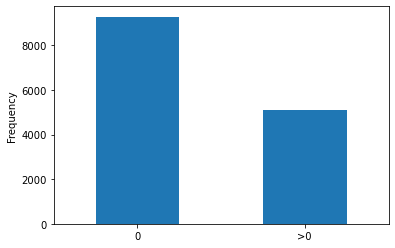

In [129]:
# number of settlements greatr than 0
((df['SETTLEMENT_AMOUNT']>0).value_counts()).plot.bar(rot=0)
plt.xticks([False, True],['0','>0'])
plt.ylabel('Frequency');

In [158]:
# dataframe without zeros
initial_year = 2002
final_year = 2021
df_nozero = df.query(f"SETTLEMENT_AMOUNT>0 & approx_loss_year>{initial_year}")
n_years = final_year - initial_year
print(n_years)
df_nozero.shape

19


(4117, 20)

In [155]:
# Percentage of each company type in the data
df['PICS2'].value_counts()/len(df_clean)*100

Information Technology    18.473951
Health Care               18.153996
Financials                17.242818
Consumer Discretionary    11.643597
Industrials               10.621131
Communication Services     6.566043
Energy                     5.049732
Materials                  4.166377
Consumer Staples           4.055088
Real Estate                2.024066
Utilities                  1.898866
Name: PICS2, dtype: float64

In [156]:
countries = df['COUNTRY_CODE'].value_counts()
countries = countries[countries > 10]#/len(df_clean)*100
countries

USA    12309
CAN      394
CHN      310
GBR      177
ISR      134
DEU      120
AUS      109
BMU       72
CHE       69
NLD       61
TWN       60
IRL       50
JPN       48
HKG       47
FRA       46
BRA       38
KOR       21
PRI       21
MEX       19
GRC       19
SGP       18
LUX       16
IND       16
RUS       15
SWE       14
CYM       12
ESP       12
ZAF       12
DNK       11
Name: COUNTRY_CODE, dtype: int64

In [164]:
# group the losses by country and year (sum) to obtain total loss per year per country, then take the average per country
total_loss_per_country = df_nozero.groupby(by=['COUNTRY_CODE']).sum()['SETTLEMENT_AMOUNT']
avg_loss_per_country = (total_loss_per_country/n_years).sort_values(ascending=False)
avg_loss_per_country


COUNTRY_CODE
USA    7.359755e+09
BRA    2.936244e+08
CAN    2.666539e+08
BMU    2.214398e+08
DEU    1.936259e+08
RUS    1.874805e+08
GBR    1.776682e+08
NLD    1.532656e+08
HKG    1.500996e+08
FRA    1.081283e+08
SWE    1.079445e+08
BEL    8.099950e+07
AUS    7.165298e+07
CHN    5.611939e+07
TUR    5.006316e+07
CHE    4.849864e+07
ISR    4.436996e+07
JPN    3.979199e+07
GRC    3.608947e+07
SGP    2.926428e+07
PRI    1.758787e+07
IRL    1.617474e+07
CYM    1.553666e+07
IND    1.102819e+07
ESP    7.981779e+06
AUT    7.368421e+06
MEX    7.049487e+06
ITA    6.476797e+06
HUN    6.399391e+06
CHL    6.062515e+06
KOR    5.095632e+06
LUX    2.581234e+06
ANT    1.865004e+06
DNK    1.212113e+06
NOR    1.105263e+06
VIR    1.105263e+06
PER    1.052632e+06
TWN    7.179199e+05
PAN    5.526316e+05
MYS    5.113379e+05
ZAF    4.758645e+05
PRT    4.322904e+05
NZL    1.578947e+05
KWT    1.283789e+05
PHL    1.223532e+05
THA    8.947368e+04
ISL    5.264276e+04
ARE    1.572316e+04
BRB    4.944211e+03
VEN    

<AxesSubplot:xlabel='COUNTRY_CODE'>

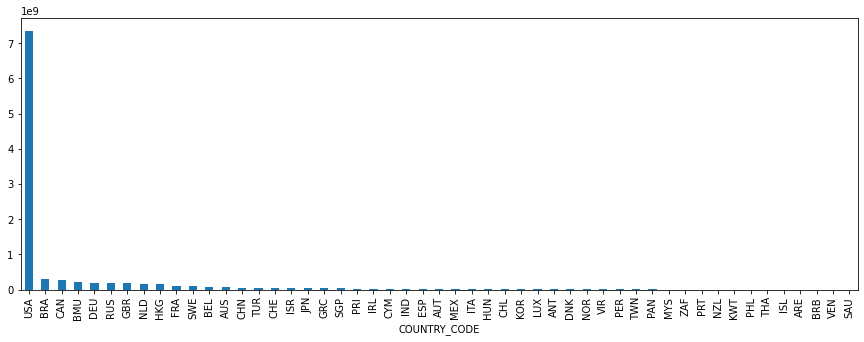

In [165]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
avg_loss_per_country.plot.bar()

In [168]:
np.diff(avg_loss_per_country)/avg_loss_per_country[:-1]

COUNTRY_CODE
USA   -0.960104
BRA   -0.091854
CAN   -0.169561
BMU   -0.125605
DEU   -0.031739
RUS   -0.052338
GBR   -0.137349
NLD   -0.020657
HKG   -0.279623
FRA   -0.001700
SWE   -0.249619
BEL   -0.115390
AUS   -0.216789
CHN   -0.107917
TUR   -0.031251
CHE   -0.085130
ISR   -0.103177
JPN   -0.093047
GRC   -0.189119
SGP   -0.398999
PRI   -0.080347
IRL   -0.039449
CYM   -0.290183
IND   -0.276239
ESP   -0.076845
AUT   -0.043284
MEX   -0.081239
ITA   -0.011951
HUN   -0.052642
CHL   -0.159486
KOR   -0.493442
LUX   -0.277476
ANT   -0.350075
DNK   -0.088152
NOR    0.000000
VIR   -0.047619
PER   -0.317976
TWN   -0.230232
PAN   -0.074722
MYS   -0.069374
ZAF   -0.091568
PRT   -0.634748
NZL   -0.186933
KWT   -0.046937
PHL   -0.268726
THA   -0.411640
ISL   -0.701323
ARE   -0.685546
BRB   -0.201618
VEN   -0.573618
Name: SETTLEMENT_AMOUNT, dtype: float64

In [91]:
exceedance_prob_regions = {region:None for region in df_clean['COUNTRY_GROUP_Region'].unique()}
for region in exceedance_prob_regions:
    df = df_clean[(df_clean['COUNTRY_GROUP_Region']==region)&(df_clean['SETTLEMENT_AMOUNT']>0)]
    settlement_amount = np.logspace(0, int(np.log(df['SETTLEMENT_AMOUNT'].max()))+ 1,100 )
    #settlement_amount = np.linspace(df['SETTLEMENT_AMOUNT'].min(), df['SETTLEMENT_AMOUNT'].max())
    total = len(df['SETTLEMENT_AMOUNT'])
    exceedance_prob = []
    for value in settlement_amount:
        n_exceed = len(df['SETTLEMENT_AMOUNT'][df['SETTLEMENT_AMOUNT']>=value ])
        prob = n_exceed/total
        exceedance_prob.append({'severity':value, 'prob':prob})
    exceedance_prob_regions[region] = pd.DataFrame(exceedance_prob)

display(exceedance_prob_regions['United States'].head())
display(exceedance_prob_regions['United States'].tail())

,severity,prob
0,1.000000,1.0
1,1.747528,1.0
2,3.053856,1.0
3,5.336699,1.0
4,9.326033,1.0


,severity,prob
95,1.072267e+23,0.0
96,1.873817e+23,0.0
97,3.274549e+23,0.0
98,5.722368e+23,0.0
99,1.000000e+24,0.0


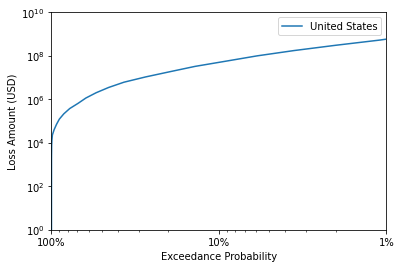

In [172]:
fig, ax = plt.subplots(1, 1)
region = 'United States'
exceedance_prob = exceedance_prob_regions[region]

ax.plot(exceedance_prob['prob'], exceedance_prob['severity'], label=region)
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([10**(-2), 10**0])
ax.set_ylim([1, 10**10])
ax.invert_xaxis ();
ax.set_xlabel('Exceedance Probability')
ax.set_xticks([10**0, 10**(-1), 10**(-2)], ['100%','10%','1%'])
ax.set_ylabel('Loss Amount (USD)');



# Data cleaning

In [186]:
df_clean = df.dropna(axis=0)
df_clean = df_clean.reset_index(drop=True)
df_clean['MarketCap_at_Loss_date'] = pd.to_numeric(df_clean['MarketCap_at_Loss_date'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10632 entries, 0 to 10631
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SETTLEMENT_AMOUNT                    10632 non-null  float64
 1   MarketCap_18_Months_Prior_Loss_date  10632 non-null  float64
 2   MarketCap_6_Months_Prior_Loss_date   10632 non-null  float64
 3   MarketCap_Trend_6_18_Months          10632 non-null  float64
 4   MarketCap_15_Months_Prior_Loss_date  10632 non-null  float64
 5   MarketCap_3_Months_Prior_Loss_date   10632 non-null  float64
 6   MarketCap_Trend_3_15_Months          10632 non-null  float64
 7   MarketCap_at_Loss_date               10632 non-null  float64
 8   Current_MarketCap                    10632 non-null  float64
 9   Current_MarketCap_12Months_prior     10632 non-null  float64
 10  MarketCap_Trend_Current              10632 non-null  float64
 11  approx_loss_year            

# Baseline model

## Baseline model uses Region and MarketCap as features

In [188]:
df_baseline = pd.get_dummies(df_clean[['Current_MarketCap', 'COUNTRY_GROUP_CONTINENT']])
df_baseline.head()

,Current_MarketCap,COUNTRY_GROUP_CONTINENT_Africa,COUNTRY_GROUP_CONTINENT_Americas,COUNTRY_GROUP_CONTINENT_Asia,COUNTRY_GROUP_CONTINENT_Europe,COUNTRY_GROUP_CONTINENT_Middle East,COUNTRY_GROUP_CONTINENT_Oceania
0,7007.32372,0,1,0,0,0,0
1,7007.32372,0,1,0,0,0,0
2,7007.32372,0,1,0,0,0,0
3,24557.30824,0,1,0,0,0,0
4,7007.32372,0,1,0,0,0,0


## Split the baseline data

## Random Forest model

In [173]:
# one hot encoding
df_process = pd.get_dummies(df_clean)
df_process.shape

(14377, 14074)